# Spatial filtering

A spatial filter consists of,

1. A neighbourhood : Rectangular area with dimensions(3x3, 5x5, 7x7,...) which can encompases several number of pixels(9, 25, 49,...).
2. A predefined operation that is performed on the image pixels encompassed by the neighborhood.

Filtering creates a new pixel,

1. At the coordinates equal to the coordinates of the center of the neighbourhood.
2. With the value genrated by the operation applied on the original image's pixels encompassed by the neighbourhood.

Note :  `cv.IMREAD_REDUCED_GRAYSCALE_2` If set, always convert image to the single channel grayscale image and the image size reduced by half.

## 1.1 Averaging filter : kernel sum to 1



(512, 384)


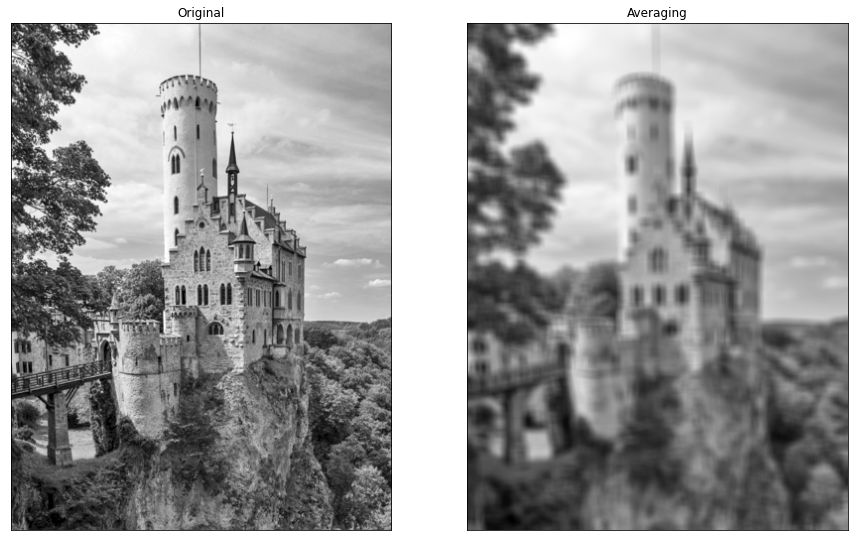

In [13]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# original img size 768*1024
img = cv.imread('castle.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Image size is reduced
print(img.shape)

# Averaging
dimension = 9
kernel = np.ones((dimension,dimension),np.float32)/(dimension**2)

# Averaging kernel sum = 1
#print( kernel, sum(sum(kernel)))


imgc = cv.filter2D(img,-1,kernel)
# -1 is the desired depth of the img

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(15,15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

## 1.2 Weighted average : kernel sum to 1

Gives more importance (weight) to some pixels at the expense of others. This reduces blurring in the smoothing process. For larger images effect of this filter and the previous filter is not distinguishable as the kernel is too small with respect to size of the image

(512, 384)
[[0.0625 0.125  0.0625]
 [0.125  0.25   0.125 ]
 [0.0625 0.125  0.0625]] 1.0


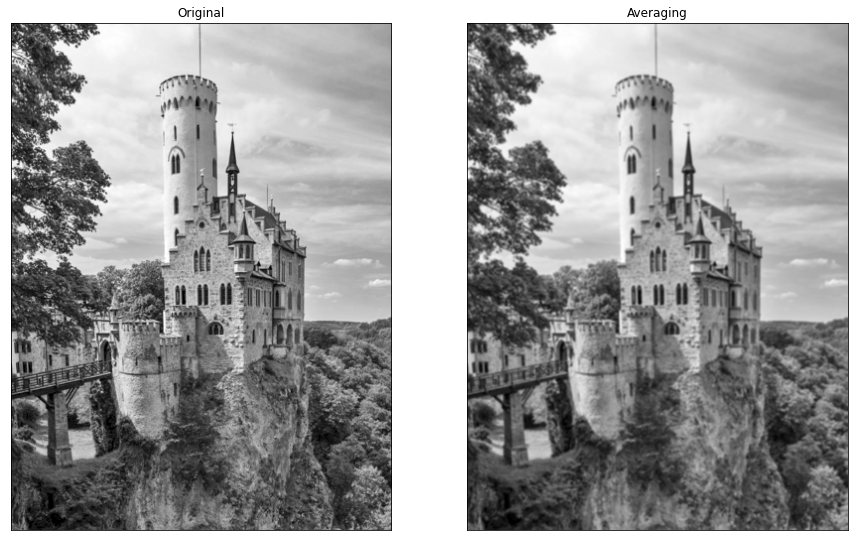

In [12]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# original img size 768*1024
img = cv.imread('castle.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

# Image size is reduced
print(img.shape)

# Averaging
kernel = np.array([(1,2,1), (2,4,2), (1,2,1)], dtype='float')/16 # Averaging kernel sum = 1
print( kernel, sum(sum(kernel)))

imgc = cv.filter2D(img,-1,kernel) # -1 is the desired depth of the img

fig, axes  = plt.subplots(1,2, sharex='all', sharey='all', figsize=(15,15))
axes[0].imshow(img, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(imgc, cmap='gray')
axes[1].set_title('Averaging')
axes[1].set_xticks([]), axes[1].set_yticks([])
plt.show()

## 2. Sobel filters

### A gradient operator to detect edges : kernal sums to 0

1. central differnce in vertical---> sobel vertical kernel --> detect horizontal edges

2. central differnce in horizontal---> sobel horizontal kernel --> detect vertical edges

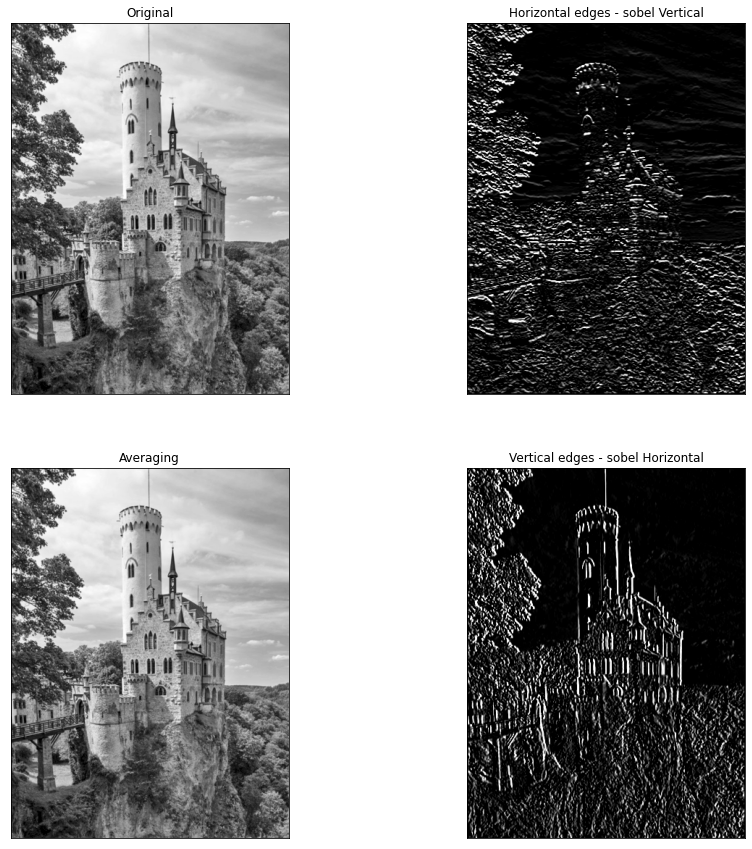

In [14]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('castle.png', cv.IMREAD_REDUCED_GRAYSCALE_2)

sobel_vertical_kernel = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float') #central differnce in vertical---> sobel vertical kernel
sobel_horizontal_kernel = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float') #central differnce in horizontal---> sobel horizontal kernel



img_hor_edges = cv.filter2D(img,-1,sobel_vertical_kernel)
img_ver_edges = cv.filter2D(img,-1,sobel_horizontal_kernel)
# -1 is the desired depth of the img


fig, axes  = plt.subplots(2,2, sharex='all', sharey='all', figsize=(15,15))
axes[0][0].imshow(img, cmap='gray')
axes[0][0].set_title('Original')
axes[0][0].set_xticks([]), axes[0][0].set_yticks([])

axes[0][1].imshow(img_hor_edges, cmap='gray')
axes[0][1].set_title('Horizontal edges - sobel Vertical')
axes[0][1].set_xticks([]), axes[0][1].set_yticks([])

axes[1][0].imshow(img, cmap='gray')
axes[1][0].set_title('Averaging')
axes[1][0].set_xticks([]), axes[1][0].set_yticks([])

axes[1][1].imshow(img_ver_edges, cmap='gray')
axes[1][1].set_title('Vertical edges - sobel Horizontal')
axes[1][1].set_xticks([]), axes[1][1].set_yticks([])

plt.show()